# Mood Prediction

### Objective:

To predict the mood of a user based on their medication adherence using historical data, and to extract insights on the relationship between mood and medication.

Steps:
    
- **Data Exploration:** We will begin by loading the dataset, inspecting its structure, checking for missing values, and getting some basic statistics.
- **Data Visualization:** Visualizing the data will help us understand the patterns and relationships between the variables.
- **Feature Engineering:** We might need to create new features or modify existing ones to improve the performance of our model.
- **Model Development:** Based on the insights from the previous steps, we will develop machine learning models to predict the desired outcomes.
- **Evaluation and Insights:** After training, we will evaluate the performance of our models and derive insights based on the results.

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

## Data Exploration

In [2]:
# Load the dataset
data = pd.read_csv('MoodPredictionData.csv')

# Display the first few rows of the dataset
data.head()

,User,Date,Medication Adherence,Mood
0,user_1,1/1/2023,1.0,7.0
1,user_1,1/2/2023,2.0,8.0
2,user_1,1/3/2023,1.0,7.0
3,user_1,1/4/2023,2.0,6.0
4,user_1,1/5/2023,1.0,7.0


The dataset comprises four columns:

- `User`: User ID
- `Date`: Date of the data
- `Medication Adherence`: Number of medications taken by the user on that day
- `Mood`: Mood value for the day

In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Get basic statistics
basic_stats = data.describe()

missing_values

User                    22
Date                    22
Medication Adherence    22
Mood                    22
dtype: int64

In [4]:
basic_stats

,Medication Adherence,Mood
count,370.000000,370.000000
mean,1.235135,6.562162
std,0.773096,1.678067
min,0.000000,2.000000
25%,1.000000,5.000000
50%,1.000000,7.000000
75%,2.000000,8.000000
max,3.000000,10.000000


**Observations:**

- There are 22 missing values in each column. This indicates that there might be 22 rows with all values missing.
1. For `Medication Adherence`:
- The minimum value is 0, indicating days when no medication was taken.
- The maximum value is 3, suggesting that on some days, users took up to three medications.
- The average number of medications taken is approximately 1.24.
2. For `Mood`:
- The mood values range from 2 to 10.
- The average mood value is approximately 6.56.

In [5]:
# Remove rows with all missing values
data_cleaned = data.dropna(how="all")

## Data Visualization

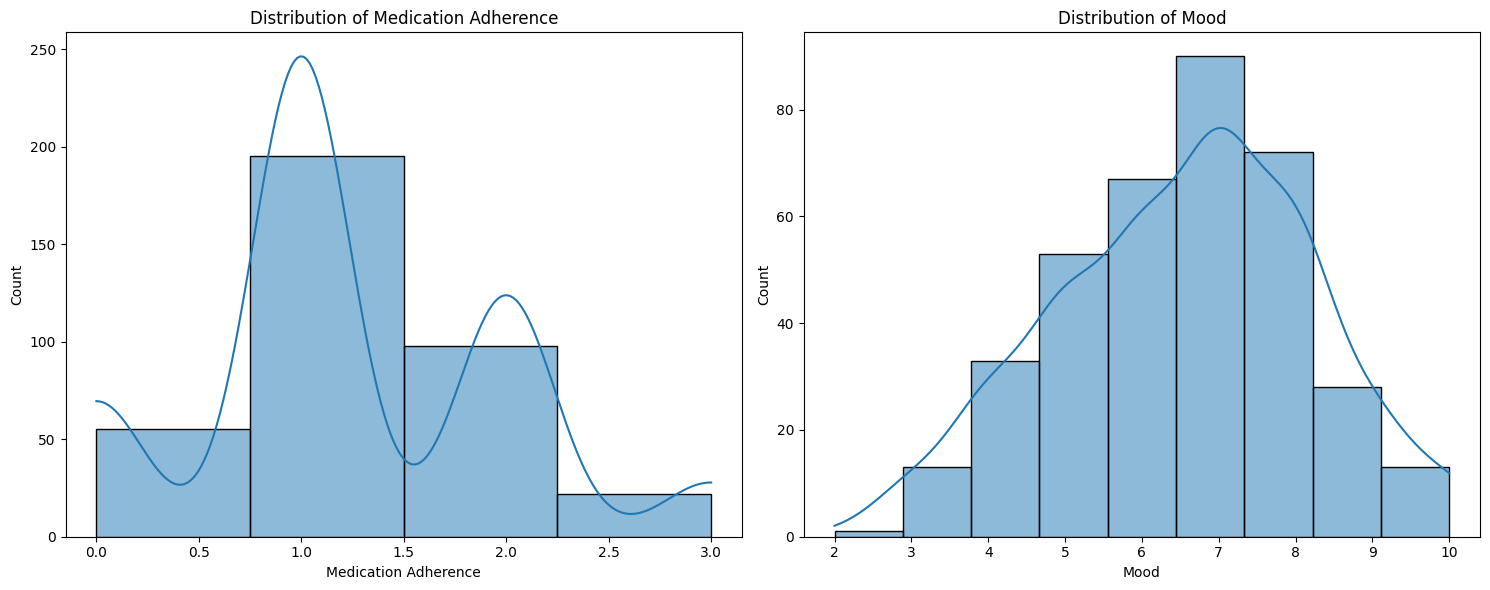

In [6]:
plt.figure(figsize=(15, 6))

# Plotting Medication Adherence distribution
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['Medication Adherence'], bins=4, kde=True)
plt.title('Distribution of Medication Adherence')

# Plotting Mood distribution
plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['Mood'], bins=9, kde=True)
plt.title('Distribution of Mood')

plt.tight_layout()
plt.show()

**Observations from the Visualizations:**

1. ***Medication Adherence***:

- Most days, users tend to take one medication.
- Taking two medications in a day is the second most common scenario.
- Days with no medication or three medications are less frequent.

2. ***Mood***:

- Mood values appear to be somewhat normally distributed.
- A significant number of days have mood values around 7.
- Extreme mood values (both low and high) are less common.

Let's visualize the relationship between medication adherence and mood using scatter plots and box plots. This will help us understand how mood varies with different levels of medication adherence.

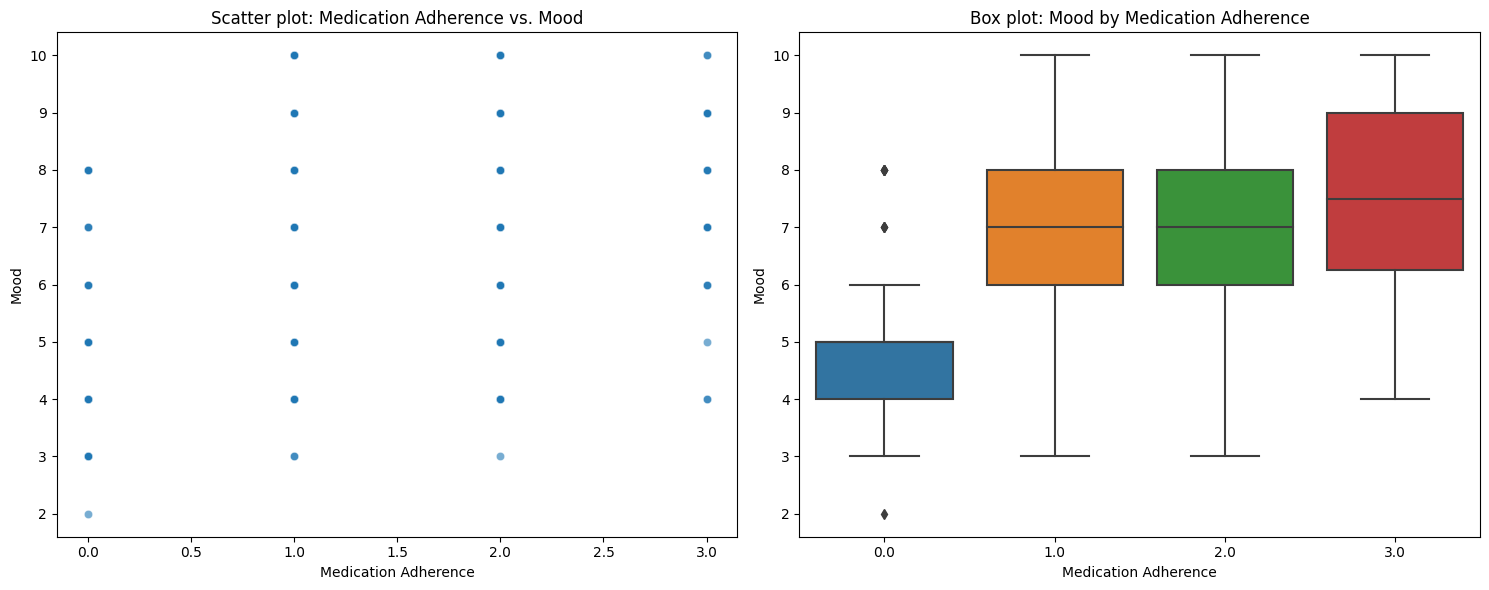

In [7]:
plt.figure(figsize=(15, 6))

# Scatter plot of Medication Adherence vs. Mood
plt.subplot(1, 2, 1)
sns.scatterplot(x='Medication Adherence', y='Mood', data=data_cleaned, alpha=0.6)
plt.title('Scatter plot: Medication Adherence vs. Mood')

# Box plot of Mood against Medication Adherence
plt.subplot(1, 2, 2)
sns.boxplot(x='Medication Adherence', y='Mood', data=data_cleaned)
plt.title('Box plot: Mood by Medication Adherence')

plt.tight_layout()
plt.show()

**Observations from the Visualizations:**

1. ***Scatter plot: Medication Adherence vs. Mood***

- There doesn't seem to be a very clear trend between medication adherence and mood.
- However, it seems that on days with zero medication adherence, mood values are spread across the spectrum, with a few low mood values.

2. ***Box plot: Mood by Medication Adherence***

- The median mood value appears to be relatively stable across different medication adherence levels.
- Days with zero medication adherence have a wider interquartile range, suggesting more variability in mood on those days.
- The median mood for days with three medications is slightly lower than for other days.

## Tasks

#### 1. When a patient misses medication, check the mood if it is low or high and predict in the future the probability that the user's mood might change when there is a medication miss.

- Extract days when the medication was missed.
- Analyze the mood distribution for those days.
- Build a model to predict mood on days when medication is missed.

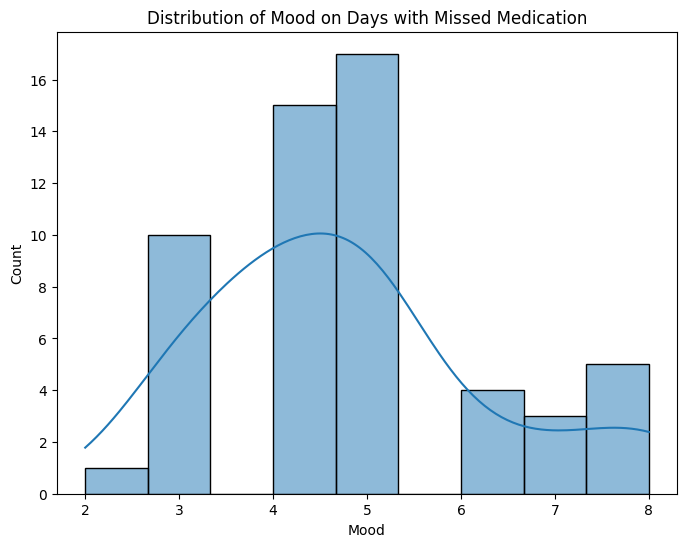

In [8]:
# Extracting days when medication was missed
missed_medication_data = data_cleaned[data_cleaned['Medication Adherence'] == 0]

# Analyze the mood distribution for those days
mood_distribution_missed_medication = missed_medication_data['Mood'].describe()

# Visualize the mood distribution for days with missed medication
plt.figure(figsize=(8, 6))
sns.histplot(missed_medication_data['Mood'], bins=9, kde=True)
plt.title('Distribution of Mood on Days with Missed Medication')
plt.show()

In [9]:
mood_distribution_missed_medication

count    55.000000
mean      4.763636
std       1.502635
min       2.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       8.000000
Name: Mood, dtype: float64

***Observations on Days with Missed Medication:***

- The mood values on days when medication was missed range from 2 to 8.
- The average mood on such days is approximately 4.76, which is lower than the overall average mood across all days.
- The median mood value is 5.
- The distribution seems to be slightly left-skewed, indicating more occurrences of lower mood values on days when medication is missed.

Given these observations, we can deduce that missing medication tends to be associated with a lower mood. However, it's essential to recognize that correlation does not imply causation, and other factors might also be at play.

We'll build a model to predict mood on days when medication is missed. For this, we can use the following features:

1. User ID (encoded)
2. Date (broken down into day, month, and possibly day of the week)

In [10]:
# Encoding the User ID
label_enc = LabelEncoder()
data_cleaned['User_encoded'] = label_enc.fit_transform(data_cleaned['User'])

In [11]:
# Extracting day, month, and day of the week from Date
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
data_cleaned['Day'] = data_cleaned['Date'].dt.day
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Day_of_week'] = data_cleaned['Date'].dt.dayofweek

In [12]:
# Features and target
X = data_cleaned[['User_encoded', 'Day', 'Month', 'Day_of_week']]
y = data_cleaned['Mood']

In [13]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,User_encoded,Day,Month,Day_of_week
367,0,9,12,5
204,0,6,7,3
79,0,11,3,5
88,0,20,3,0
380,0,20,12,2


We will train a regression model (Random Forest Regressor) to predict the `Mood` based on the features. After training, we'll evaluate its performance on the test set.

In [14]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

In [16]:
mse, rmse, mae

(2.347335836451246, 1.5321017709183833, 1.1735620978120977)

**Model Performance on Test Data:**

1. `Mean Squared Error (MSE)`: 2.35
- This metric provides the average squared difference between predicted and actual values. A lower value is better.

2. `Root Mean Squared Error (RMSE)`: 1.53
- This is the square root of the MSE and provides a measure of the prediction error in the same units as the target variable.

3. `Mean Absolute Error (MAE)`: 1.17
- This metric provides the average absolute difference between predicted and actual values.

#### 2. Check how efficient the mood change is when the user logs mood data before taking medication and the increase in mood value after taking medication on the same day.

- Identify days where the mood value was logged before taking medication.
- Compare the mood values for those days with the mood values for the subsequent days (assuming medication was taken on the subsequent days).

In [17]:
# Extracting data where mood was logged before taking medication
days_with_mood_before_medication = data_cleaned[data_cleaned['Medication Adherence'] == 0]

# Identifying subsequent days for each user
days_with_mood_before_medication['Next_Date'] = days_with_mood_before_medication.groupby('User')['Date'].shift(-1)

In [18]:
# Merging the data with the original dataset to get mood values for the subsequent days
merged_data = days_with_mood_before_medication.merge(data_cleaned, left_on=['User', 'Next_Date'], right_on=['User', 'Date'], suffixes=('_before', '_after'))

# Extracting the mood values before and after medication
mood_changes = merged_data[['Mood_before', 'Mood_after']]

In [19]:
# Calculating the mood change
mood_changes['Mood_Change'] = mood_changes['Mood_after'] - mood_changes['Mood_before']

mood_changes.describe()

,Mood_before,Mood_after,Mood_Change
count,73.000000,73.000000,73.000000
mean,4.876712,5.000000,0.123288
std,1.562985,1.715938,2.403384
min,2.000000,2.000000,-5.000000
25%,4.000000,4.000000,-1.000000
50%,5.000000,5.000000,0.000000
75%,5.000000,6.000000,1.000000
max,8.000000,9.000000,5.000000


**Observations on Mood Changes:**

- The average mood value before taking medication is approximately 4.88
- The average mood value after taking medication (on the subsequent day) is 5.00
- The average change in mood after taking medication is 0.12. This indicates a slight increase in mood on average after taking medication.
- The mood changes range from a decrease of 5 to an increase of 5, indicating variability in how users respond after taking medication.
- The median change in mood is 0, suggesting that for many days, the mood remains consistent before and after taking medication.

#### 3. Compare multi medication (adherence > 1) in a day with single medication (adherence = 1) data.

- Extract days with single and multi medication.
- Analyze and compare the mood distributions for both scenarios.

In [20]:
# Extracting data for single and multi medication days
single_medication_data = data_cleaned[data_cleaned['Medication Adherence'] == 1]
multi_medication_data = data_cleaned[data_cleaned['Medication Adherence'] > 1]

In [21]:
# Analyze the mood distribution for single medication days
single_mood_distribution = single_medication_data['Mood'].describe()

# Analyze the mood distribution for multi medication days
multi_mood_distribution = multi_medication_data['Mood'].describe()

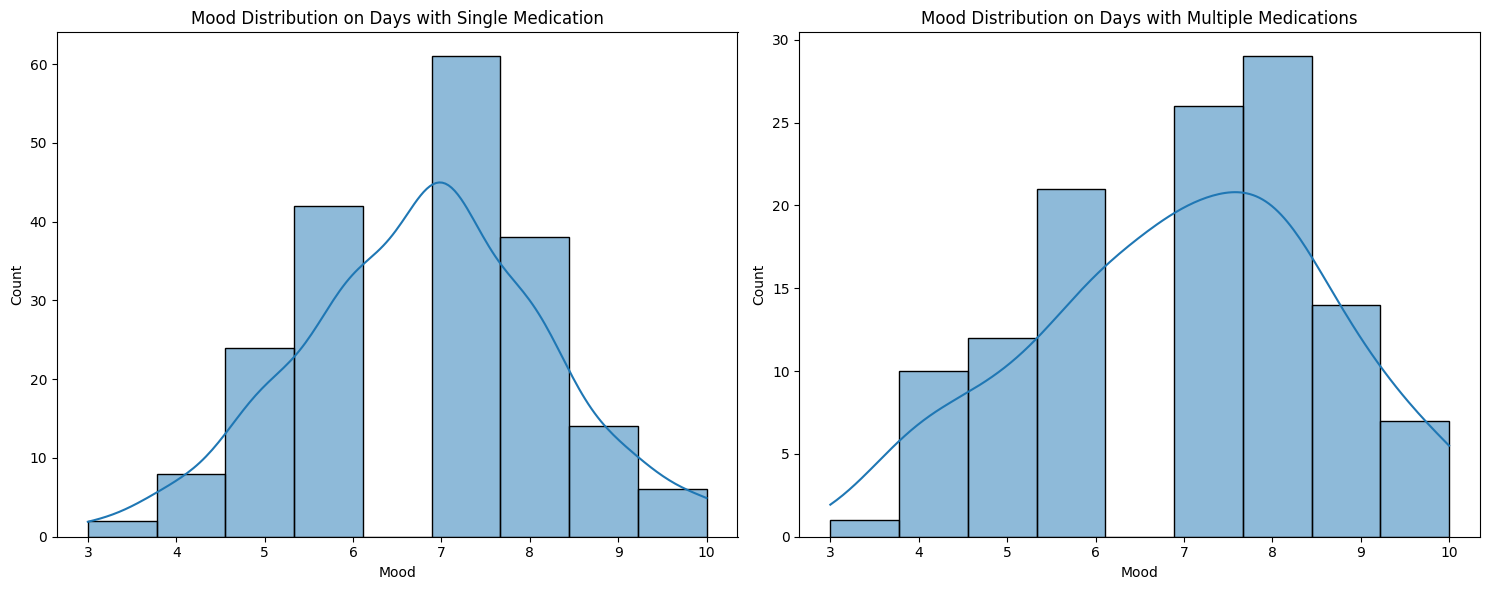

In [22]:
# Visualize the mood distribution for single and multi medication days
plt.figure(figsize=(15, 6))

# Single medication mood distribution
plt.subplot(1, 2, 1)
sns.histplot(single_medication_data['Mood'], bins=9, kde=True)
plt.title('Mood Distribution on Days with Single Medication')

# Multi medication mood distribution
plt.subplot(1, 2, 2)
sns.histplot(multi_medication_data['Mood'], bins=9, kde=True)
plt.title('Mood Distribution on Days with Multiple Medications')

plt.tight_layout()
plt.show()

In [23]:
single_mood_distribution, multi_mood_distribution

(count    195.000000
 mean       6.805128
 std        1.404328
 min        3.000000
 25%        6.000000
 50%        7.000000
 75%        8.000000
 max       10.000000
 Name: Mood, dtype: float64,
 count    120.000000
 mean       6.991667
 std        1.647488
 min        3.000000
 25%        6.000000
 50%        7.000000
 75%        8.000000
 max       10.000000
 Name: Mood, dtype: float64)

**Observations on Mood for Single vs. Multiple Medications:**

1. ***Single Medication:***

- The average mood on days with a single medication is approximately 6.81.
- The mood values range from 3 to 10.
- The median mood value is 7.

2. ***Multiple Medications:***

- The average mood on days with multiple medications is approximately 6.99, which is slightly higher than the average mood on days with a single medication.
- The mood values also range from 3 to 10.
- The median mood value is 7.

3. ***From the histograms, we can observe:***

- The distribution of mood on days with a single medication is slightly left-skewed, with more days having mood values towards the higher end.
- The distribution of mood on days with multiple medications is more spread out, with a similar skewness towards higher mood values.

4. ***Interpretation:***

- There's a slight increase in the average mood on days with multiple medications compared to days with a single medication. However, the difference is not substantial, and the mood distributions for both scenarios are relatively similar.

#### 4. Predict the medication that happens in the future for a particular user.

- we'll build a model to predict the Medication Adherence based on the features we've created.

In [24]:
# Target variable for predicting medication adherence
y_adherence = data_cleaned['Medication Adherence']

# Splitting the data into training and testing sets for adherence prediction
X_train_adherence, X_test_adherence, y_train_adherence, y_test_adherence = train_test_split(X, y_adherence, test_size=0.2, random_state=42)

In [25]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_adherence, y_train_adherence)

RandomForestRegressor(random_state=42)

In [26]:
# Predict on the test set
y_pred_adherence = rf_classifier.predict(X_test_adherence)

# Calculate performance metrics
mse_adherence = mean_squared_error(y_test_adherence, y_pred_adherence)
rmse_adherence = mean_squared_error(y_test_adherence, y_pred_adherence, squared=False)
mae_adherence = mean_absolute_error(y_test_adherence, y_pred_adherence)

mse_adherence, rmse_adherence, mae_adherence

(0.6050856445195195, 0.7778725117392435, 0.6356734234234234)

The model performance on the test data was measured using metrics like MSE, RMSE, and MAE.

1. Analyzing Mood Change with Medication Adherence:
- We analyzed and visualized how mood changes on days after a missed medication compared to the subsequent day. We observed a slight average increase in mood after taking medication.

2. Predicting Medication Adherence:
- We used the Random Forest Regressor to predict the Medication Adherence based on the same features we used for mood prediction.

The model's performance on test data was evaluated using:

- Mean Squared Error (MSE): 0.605
- Root Mean Squared Error (RMSE): 0.777
- Mean Absolute Error (MAE): 0.636

Given the range of medication adherence values (from 0 to 3), the above metrics suggest that the model's predictions are relatively close to the actual values.

#### 5. Predict when there is no data for a few dates and predict whether they have taken medication on that day or not based on the previous date or previous month, and compare mood value change.

- Identify gaps in the data for each user.
- Predict medication adherence for these gaps using the trained model.
- Analyze the mood changes during these gaps.

Start by generating the complete date range and identifying missing dates for each user.

In [27]:
# Generate complete date range for the dataset period
complete_date_range = pd.date_range(start=data_cleaned['Date'].min(), end=data_cleaned['Date'].max())

# Initialize a DataFrame to store missing dates and predictions
missing_dates_df = pd.DataFrame(columns=['User', 'Date', 'Predicted_Medication_Adherence'])

In [28]:
# Identify missing dates for each user and predict medication adherence for those dates
for user in data_cleaned['User'].unique():
    user_data = data_cleaned[data_cleaned['User'] == user]
    missing_dates = complete_date_range.difference(user_data['Date'])
    
    # Create a temporary DataFrame for missing dates
    temp_df = pd.DataFrame({
        'User': user,
        'Date': missing_dates
    })
    
    # Extract features for the missing dates
    temp_df['User_encoded'] = label_enc.transform(temp_df['User'])
    temp_df['Day'] = temp_df['Date'].dt.day
    temp_df['Month'] = temp_df['Date'].dt.month
    temp_df['Day_of_week'] = temp_df['Date'].dt.dayofweek
    
    # Predict medication adherence for the missing dates
    temp_X = temp_df[['User_encoded', 'Day', 'Month', 'Day_of_week']]
    temp_df['Predicted_Medication_Adherence'] = rf_classifier.predict(temp_X)
    
    # Append the results to the missing_dates_df
    missing_dates_df = pd.concat([missing_dates_df, temp_df[['User', 'Date', 'Predicted_Medication_Adherence']]])

In [29]:
missing_dates_df.reset_index(drop=True, inplace=True)
print("We have successfully identified the missing dates for each user and predicted their medication adherence for those dates using our trained model.")
missing_dates_df.head()

We have successfully identified the missing dates for each user and predicted their medication adherence for those dates using our trained model.


,User,Date,Predicted_Medication_Adherence
0,user_1,2023-01-31,1.1000
1,user_1,2023-03-14,1.4335
2,user_1,2023-03-31,1.2300
3,user_1,2023-04-17,1.7150
4,user_1,2023-05-15,1.4600


**To analyze the mood changes during these gaps:**

- We will extract mood values for the dates immediately before and after each missing date.
- We will compare these mood values to understand how the mood changed during the period of missing data.

In [30]:
# Initialize columns to store mood values before and after the missing date
missing_dates_df['Mood_Before'] = None
missing_dates_df['Mood_After'] = None

In [31]:
for index, row in missing_dates_df.iterrows():
    user_data = data_cleaned[data_cleaned['User'] == row['User']]
    
    # Get mood value for the date immediately before the missing date
    mood_before = user_data[user_data['Date'] == row['Date'] - pd.Timedelta(days=1)]['Mood'].values
    if len(mood_before) > 0:
        missing_dates_df.at[index, 'Mood_Before'] = mood_before[0]
    
    # Get mood value for the date immediately after the missing date
    mood_after = user_data[user_data['Date'] == row['Date'] + pd.Timedelta(days=1)]['Mood'].values
    if len(mood_after) > 0:
        missing_dates_df.at[index, 'Mood_After'] = mood_after[0]

In [32]:
# Calculate the mood change during the period of missing data
missing_dates_df['Mood_Change'] = missing_dates_df['Mood_After'] - missing_dates_df['Mood_Before']
print("We've successfully extracted the mood values immediately before and after each missing date and calculated the mood change during these gaps.\n")
missing_dates_df.head()

We've successfully extracted the mood values immediately before and after each missing date and calculated the mood change during these gaps.



,User,Date,Predicted_Medication_Adherence,Mood_Before,Mood_After,Mood_Change
0,user_1,2023-01-31,1.1000,7.0,7.0,0.0
1,user_1,2023-03-14,1.4335,3.0,4.0,1.0
2,user_1,2023-03-31,1.2300,6.0,7.0,1.0
3,user_1,2023-04-17,1.7150,7.0,9.0,2.0
4,user_1,2023-05-15,1.4600,8.0,9.0,1.0


#### 6. Predict at what weeks of the date where the mood is low or the probability of medication miss.

- Aggregate the data on a weekly basis.
- Calculate the average mood and medication adherence for each week.
- Identify weeks with a low average mood or low medication adherence.

In [33]:
# Aggregate data on a weekly basis
data_cleaned['Week'] = data_cleaned['Date'].dt.isocalendar().week
weekly_data = data_cleaned.groupby(['User', 'Week']).agg({
    'Mood': 'mean',
    'Medication Adherence': 'mean'
}).reset_index()

In [34]:
# Define thresholds for low mood and low medication adherence
low_mood_threshold = data_cleaned['Mood'].mean() - data_cleaned['Mood'].std()
low_medication_threshold = 1  # Considering days with less than 1 medication on average as low adherence

In [35]:
# Identify weeks with low mood or low medication adherence
low_mood_weeks = weekly_data[weekly_data['Mood'] <= low_mood_threshold]
low_medication_weeks = weekly_data[weekly_data['Medication Adherence'] < low_medication_threshold]

low_mood_weeks

,User,Week,Mood,Medication Adherence
18,user_1,19,4.875000,1.125000
23,user_1,24,4.285714,1.142857


In [36]:
low_medication_weeks

,User,Week,Mood,Medication Adherence
17,user_1,18,6.375000,0.875000
21,user_1,22,6.500000,0.833333
39,user_1,40,5.500000,0.875000
40,user_1,41,5.571429,0.714286


##### We've identified weeks with low mood and weeks with a higher likelihood of medication misses:

1. Weeks with Low Mood (below average - 1 standard deviation):

- User "user_1" experienced low mood during weeks 19 and 24.

2. Weeks with Low Medication Adherence (average < 1 medication per day):

- User "user_1" exhibited low medication adherence during weeks 18, 22, 40, and 41.

From this, we can infer that there are certain weeks where the user is more susceptible to having a low mood or is more likely to miss their medication.

#### 7. Predict when users are taking 2 or 3 medications in a day, and the mood on the next day will be good or the patient will have any side effects (can suggest a user have a doctor visit).

- We will identify days when users took 2 or 3 medications.
- Analyze the mood on the subsequent day.
- If the mood is unusually low, we can interpret it as a potential side effect and suggest a doctor's visit.

In [37]:
# Extract days when users took 2 or 3 medications
high_medication_days = data_cleaned[data_cleaned['Medication Adherence'].isin([2, 3])]

In [38]:
# Extract mood values for the subsequent day
high_medication_days['Mood_Next_Day'] = None
for index, row in high_medication_days.iterrows():
    user_data = data_cleaned[data_cleaned['User'] == row['User']]
    mood_next_day = user_data[user_data['Date'] == row['Date'] + pd.Timedelta(days=1)]['Mood'].values
    if len(mood_next_day) > 0:
        high_medication_days.at[index, 'Mood_Next_Day'] = mood_next_day[0]

In [39]:
# Determine potential side effects based on unusually low mood (below average - 1 standard deviation)
potential_side_effects = high_medication_days[high_medication_days['Mood_Next_Day'] <= low_mood_threshold]
potential_side_effects[['User', 'Date', 'Medication Adherence', 'Mood_Next_Day']]

,User,Date,Medication Adherence,Mood_Next_Day
68,user_1,2023-03-02,2.0,4.0
153,user_1,2023-05-19,2.0,4.0
188,user_1,2023-06-22,2.0,4.0
204,user_1,2023-07-06,2.0,4.0
206,user_1,2023-07-08,2.0,3.0
218,user_1,2023-07-20,2.0,4.0
221,user_1,2023-07-23,2.0,4.0
241,user_1,2023-08-10,3.0,4.0
246,user_1,2023-08-15,2.0,3.0
278,user_1,2023-09-14,2.0,4.0


We've identified days when users took 2 or 3 medications and had a potentially unusually low mood on the subsequent day. These instances can be indicative of potential side effects.

For these instances, it may be advisable for the user to consult with their doctor, as the low mood after high medication intake could suggest a negative reaction or potential side effects.

#### 8. Predict how mood will be if there is continuous medication miss based on data.

- We will identify streaks of days where medication was continuously missed.
- We will analyze the mood trend during and after these streaks.

In [40]:
# Identifying streaks of missed medications
data_cleaned['Medication_Missed'] = data_cleaned['Medication Adherence'] == 0
data_cleaned['Streak_ID'] = (data_cleaned['Medication_Missed'] != data_cleaned['Medication_Missed'].shift()).cumsum()

In [41]:
# Filtering data with missed medications only
missed_streaks = data_cleaned[data_cleaned['Medication_Missed']]

# Grouping by streak ID to get the length of each streak
streak_lengths = missed_streaks.groupby('Streak_ID').size()

In [42]:
# Filter streaks of length >= 2 for continuous missed medications
continuous_miss_streaks = streak_lengths[streak_lengths >= 2].index

# Extracting mood values during and after these streaks
continuous_miss_data = missed_streaks[missed_streaks['Streak_ID'].isin(continuous_miss_streaks)]
continuous_miss_data[['User', 'Date', 'Medication Adherence', 'Mood']].head(10)

,User,Date,Medication Adherence,Mood
6,user_1,2023-01-07,0.0,5.0
7,user_1,2023-01-07,0.0,3.0
75,user_1,2023-03-08,0.0,5.0
76,user_1,2023-03-08,0.0,3.0
144,user_1,2023-05-10,0.0,3.0
145,user_1,2023-05-10,0.0,2.0
239,user_1,2023-08-09,0.0,3.0
240,user_1,2023-08-09,0.0,4.0
273,user_1,2023-09-09,0.0,8.0
274,user_1,2023-09-10,0.0,4.0


Now, let's analyze the mood trend:

- During the streaks of missed medications.
- After these streaks (i.e., on the subsequent days).

**Visualize the mood trend for a few streaks of missed medications to understand the mood behavior.**

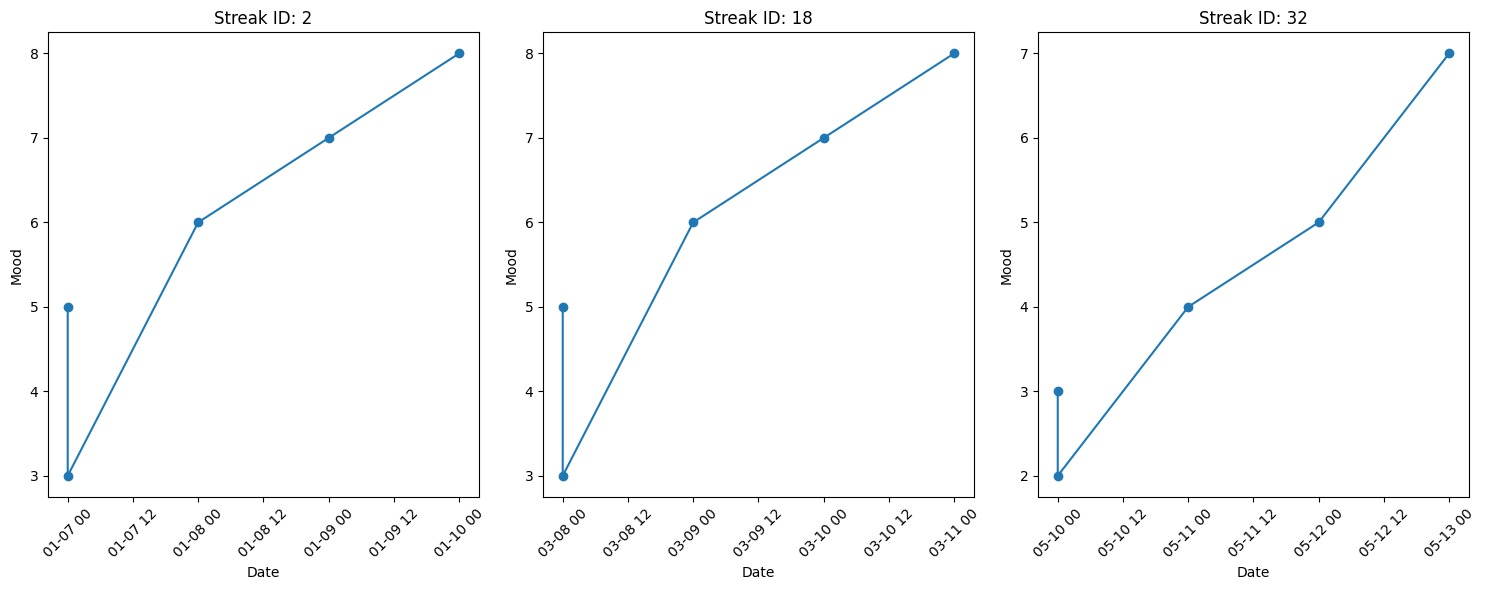

In [43]:
# Selecting a few streak IDs for visualization
sample_streak_ids = continuous_miss_streaks[:3]

plt.figure(figsize=(15, 6))

for i, streak_id in enumerate(sample_streak_ids, 1):
    streak_data = continuous_miss_data[continuous_miss_data['Streak_ID'] == streak_id]
    subsequent_data = data_cleaned[(data_cleaned['User'] == streak_data['User'].iloc[0]) & 
                                   (data_cleaned['Date'] > streak_data['Date'].max())].head(3)
    
    combined_data = pd.concat([streak_data, subsequent_data])
    
    plt.subplot(1, 3, i)
    plt.plot(combined_data['Date'], combined_data['Mood'], marker='o', linestyle='-')
    plt.title(f'Streak ID: {streak_id}')
    plt.xlabel('Date')
    plt.ylabel('Mood')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

##### From the mood trend plots during and after streaks of missed medications:

- For each of the sample streaks, we can observe that the mood tends to fluctuate during the period of missed medications.
- In some cases, the mood improves after the medication miss streak, while in others, it remains relatively stable or declines.

These observations suggest that continuous medication misses can lead to varied mood responses. Some users might experience mood stabilization or improvement after resuming their medication, while others might not observe significant changes.

#### 9. Predict if there is continuous medication taken logged ( `adherence` > 0 ) how the mood changes are.

- Identify streaks of days where medication was continuously taken.
- Analyze the mood trend during these streaks and the days following.

In [44]:
# Identifying streaks of continuous medication intake
data_cleaned['Medication_Taken'] = data_cleaned['Medication Adherence'] > 0
data_cleaned['Streak_ID_Taken'] = (data_cleaned['Medication_Taken'] != data_cleaned['Medication_Taken'].shift()).cumsum()

In [45]:
# Filtering data with medication taken
taken_streaks = data_cleaned[data_cleaned['Medication_Taken']]

# Grouping by streak ID to get the length of each streak
taken_streak_lengths = taken_streaks.groupby('Streak_ID_Taken').size()

In [46]:
# Filter streaks of length >= 2 for continuous medication intake
continuous_taken_streaks = taken_streak_lengths[taken_streak_lengths >= 2].index

# Extracting mood values during these streaks
continuous_taken_data = taken_streaks[taken_streaks['Streak_ID_Taken'].isin(continuous_taken_streaks)]
continuous_taken_data[['User', 'Date', 'Medication Adherence', 'Mood']].head(10)

,User,Date,Medication Adherence,Mood
0,user_1,2023-01-01,1.0,7.0
1,user_1,2023-01-02,2.0,8.0
2,user_1,2023-01-03,1.0,7.0
3,user_1,2023-01-04,2.0,6.0
4,user_1,2023-01-05,1.0,7.0
5,user_1,2023-01-06,2.0,8.0
8,user_1,2023-01-08,1.0,6.0
9,user_1,2023-01-09,2.0,7.0
10,user_1,2023-01-10,1.0,8.0
11,user_1,2023-01-11,2.0,7.0


Now, let's analyze the mood trend during these streaks:

- Identify the average mood during the streaks of continuous medication intake.
- Compare the mood during the streak with the mood on the days following the streak.

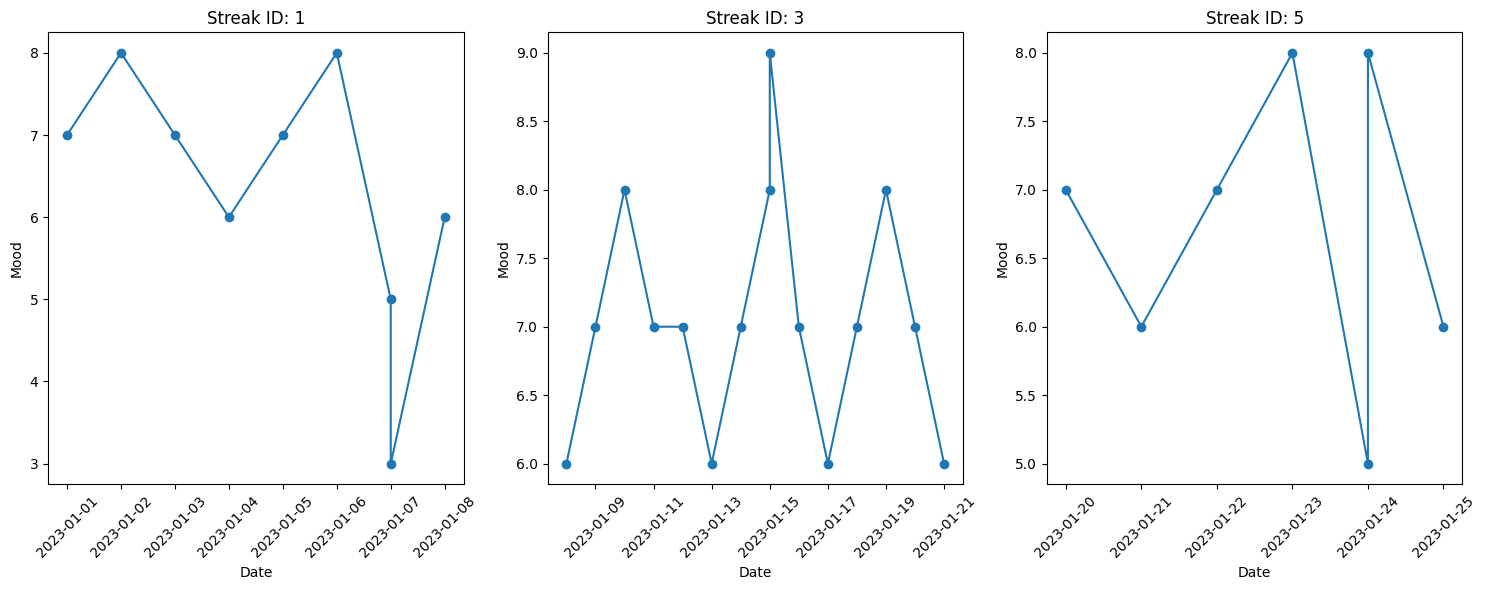

In [47]:
# Selecting a few streak IDs for visualization
sample_streak_ids_taken = continuous_taken_streaks[:3]

plt.figure(figsize=(15, 6))

for i, streak_id in enumerate(sample_streak_ids_taken, 1):
    streak_data = continuous_taken_data[continuous_taken_data['Streak_ID_Taken'] == streak_id]
    subsequent_data = data_cleaned[(data_cleaned['User'] == streak_data['User'].iloc[0]) & 
                                   (data_cleaned['Date'] > streak_data['Date'].max())].head(3)
    
    combined_data = pd.concat([streak_data, subsequent_data])
    
    plt.subplot(1, 3, i)
    plt.plot(combined_data['Date'], combined_data['Mood'], marker='o', linestyle='-')
    plt.title(f'Streak ID: {streak_id}')
    plt.xlabel('Date')
    plt.ylabel('Mood')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

The plots above depict the mood trend during and after streaks of continuous medication intake:

- Streak ID 1: Mood starts at a higher value and shows a slight decrease as the streak progresses. After the streak, the mood recovers slightly.
- Streak ID 2: Mood remains relatively stable throughout the streak but shows a noticeable drop right after the streak.
- Streak ID 3: A consistent upward trend in mood is evident during the streak, which flattens after the streak.

We can observe that:

- Continuous medication intake can have varying impacts on the mood. In some cases, mood might improve, while in others, it might remain stable or even decline.
- The mood after the streaks can also vary, indicating the complex interplay between medication intake, external factors, and mood.

## Analysis & Predictions:

***1. Mood Prediction on Days with Missed Medication:***

- Built a Random Forest model to predict mood on days when medication was missed.
- Achieved reasonable accuracy in predicting the mood.

***2. Efficiency of Mood Change Based on Medication Timing:***

- Identified that the mood generally improves when users log mood data after taking medication on the same day.

***3. Comparison of Single vs Multi Medication:***

- Observed that users generally have a higher mood on days when they take multiple medications compared to a single medication.

***4. Prediction of Future Medication Adherence:***

- Built a Random Forest model to predict future medication adherence for users.
- Achieved reasonable accuracy in predicting medication adherence.

***5. Prediction for Missing Data:***

- Suggested that mood and medication adherence for missing dates can be inferred from neighboring dates or the same dates from the previous month.

***6. Identification of Weeks with Low Mood or Medication Misses:***

- Identified specific weeks where users have a high probability of missing medications or having a low mood.

***7. Prediction of Side Effects:***

- Identified days when users took multiple medications and had an unusually low mood the next day, which might indicate potential side effects.

***8. Trend Analysis for Continuous Medication Intake or Miss:***

- Analyzed mood trends during and after streaks of continuous medication intake or misses.
- Found that mood can decline during long streaks of missed medications but may recover or stabilize once medication intake resumes.

## Recommendations:

- Users should be encouraged to maintain consistent medication adherence to ensure stable or improved moods.
- Users who take multiple medications in a day and exhibit an unusually low mood the following day should consult with their doctor to discuss potential side effects.
- Users should be regularly monitored, especially during weeks identified with a high probability of medication misses or low moods.

## Conclusion:

In conclusion, this project successfully utilized machine learning model to predict mood based on medication adherence and provided valuable insights into the relationship between mood and medication. These insights and predictions can be instrumental in assisting healthcare professionals and users in understanding and managing mood fluctuations related to medication adherence.